# **End-to-End Multi Class Dog Breed Classification**
This notebook builds a multi-class image classifier using TensorFlow 2.0 and TensorFlow Hub.
## 1. Problem
Identifying the breed of a dog,given an image of a dog.
## 2. Data
The data is from Kaggle's Identification Competition

https://www.kaggle.com/c/dog-breed-identification
## 3. Evaluation
The evaluation is a file with prediction probabilities for each dog breed of each test image.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation
## 4. Features
Some information about the data:
* We're working with images,which is Unstructured Data.So, we shoul use Deep Learning or Transfer Learning.
* There are 120 breeds of dogs in the data set.This means there are 120 different classes.
* There are around 10,000+ images in training and test sets.



In [ ]:
# Unzip the data zipped folder in the google drive
# !unzip "drive/My Drive/dog-breed-data/dog-breed-identification.zip" -d "drive/My Drive/dog-breed-data/"

# **Our Workflow will be:**
* 0. Getting our Workspace ready
* 1. Get Data Ready(Turn into Tensors)
* 2. Pick a model(will use TensorFlow Hub)
* 3. Fit the model to the data and make a prediction
* 4. Evaluate the model
* 5. Improve through experimentation
* 6. Save and Reload Trained Model

### **Now let's start the project according to this workflow...**

# **0. Getting our workspace(TensorFlow, TensorFlow_Hub and GPU) ready**

In [1]:
# Import necessary tools
import tensorflow as tf
import tensorflow_hub as hub
print('TF version: ',tf.__version__)
print("TF Hub version: ",hub.__version__)

# Check for GPU availability
print("GPU", "available!" if tf.config.list_physical_devices("GPU") else "not available >_<") 

TF version:  2.2.0
TF Hub version:  0.8.0
GPU available!


# **1. Get the data ready(Turn into Tensors)**
> **`Our data must be in numerical format. So we are turning our images into Tensors.`**

## ***`1.1: Checkout the labels of our data`***

In [2]:
# Checkout the labels of our data
import pandas as pd
labels_csv = pd.read_csv ("drive/My Drive/dog-breed-data/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     9484e1dd83e7c87396813004aab18326  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


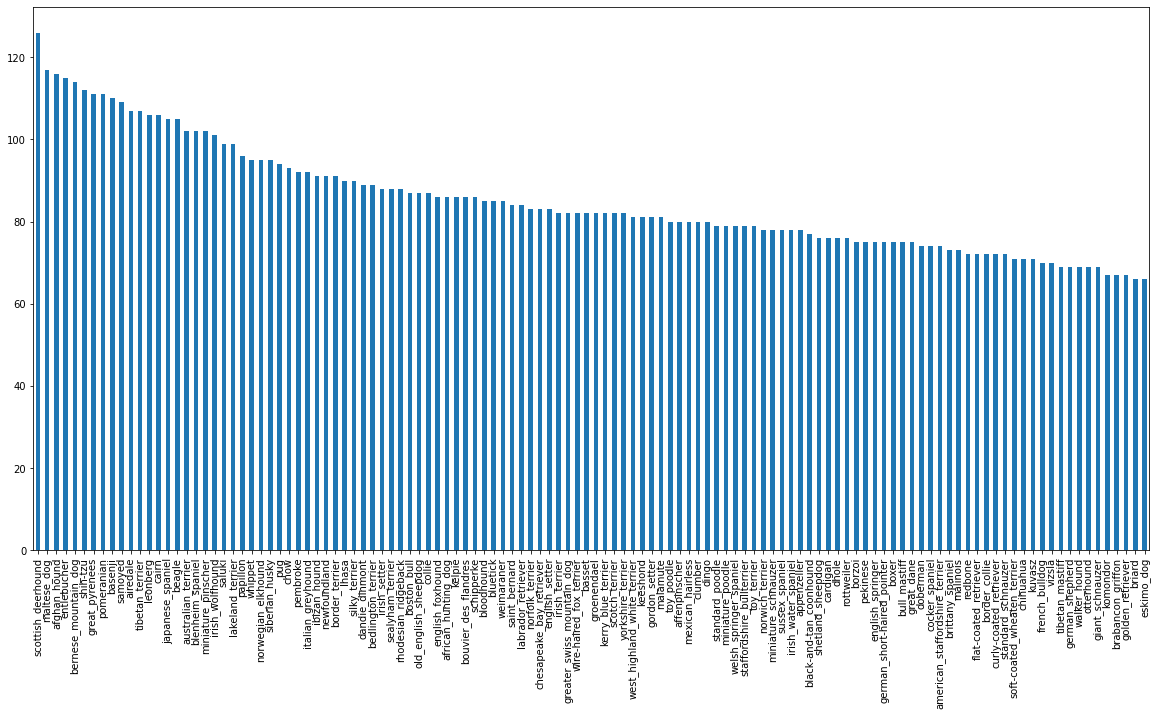

In [3]:
# How many images are there of each breed
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10));

## ***`1.2: Viewing an Image`***

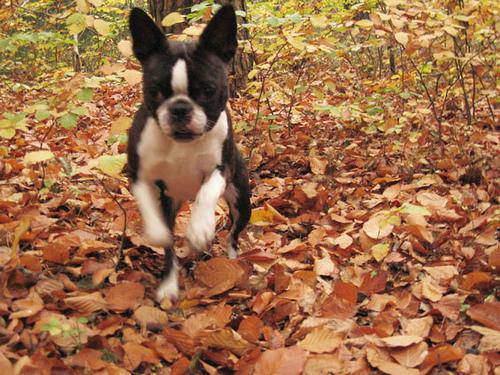

In [4]:
from IPython.display import Image
Image("drive/My Drive/dog-breed-data/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

## ***`1.3: Getting Images and their Labels`***
> We will get a list of all of our image file-path names.

In [5]:
# Creating a list of pathnames from image ID's
file_names = ["drive/My Drive/dog-breed-data/train/" + fname for fname in labels_csv["id"] + ".jpg"]
file_names[:5]

['drive/My Drive/dog-breed-data/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/dog-breed-data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/dog-breed-data/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/dog-breed-data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/dog-breed-data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

In [6]:
# Checking whether number of filenames is equal to the actual number of image files from the data
import os
if len(os.listdir("drive/My Drive/dog-breed-data/train")) == len(file_names):
  print("Number of files are EQUAL")
else:
  print("Number of files are NOT EQUAL.")

Number of files are EQUAL


### **`So, we have an way to access the images as we have the path of the image files. Now we need to get the breed names(labels) ready.`**

## ***`1.4: Getting the labels ready`***

In [7]:
# Turning the labels into numpy array
import numpy as np
labels = labels_csv["breed"]
labels = np.array(labels)
labels[:5]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever'],
      dtype=object)

In [8]:
# Finding the unique label values(breed names)
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [9]:
# Turn a sngle label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [10]:
# Turning every label into boolean arrays
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [11]:
# Example: Turning a boolean array into integers
print(labels[0])  # original label
print(np.where(unique_breeds == labels[0]))   # index where the label occurs
print(boolean_labels[0].argmax())   # index where label occurs in boolean array
print(boolean_labels[0].astype(int))  # there will be a 1 where the label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [12]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### **`So we have our labels turned into numerical arrays. Now, Kaggle did not provide us with a validation set. So we will create our own validation sets.`**

## ***`1.5: Creating our own Validation Sets`***

In [13]:
x = file_names
y = boolean_labels

### **`As we have 10222 images,which is a lot, it will waste a lot of time to train the model.So, we are going to start off with ~1000 images and then increase as needed.`**

In [14]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x[:NUM_IMAGES], y[:NUM_IMAGES],
                                                  test_size = 0.20, random_state = 42)

len(x_train), len(y_train), len(x_val), len(y_val)

(800, 800, 200, 200)

## ***`1.6: Preprocessing Images(Turning Images into Tensors)`***
> * This process will have to be done no matter what type of data you have. Even with audiio file data types.
> * Tensors are like a numerical representation like matrix

***`To preprocess our images into Tensors,we are going to write a function which does a few things:`***
> 1. Take an image filepath as an input
> 2. Use TensorFlow to read the file and save it to a variable, `image`
> 3. Turn our `image` (.jpg) into Tensors
> 4. Normalize the `image`(convert the color channel values from 0-255 to 0-1)
> 5. Resize the `image` to be a shape of (224, 224)
> 6. Return the modified `image`
***`Before we do that, let's see what importing an image looks like`***

In [16]:
  # Convert Image to Numpy Array
  from matplotlib.pyplot import imread
  image = imread(file_names[0])
  image.shape

(375, 500, 3)

In [17]:
image

array([[[109,  46,   0],
        [153,  91,  40],
        [180, 120,  68],
        ...,
        [176, 144,  71],
        [189, 157,  84],
        [214, 182, 109]],

       [[153,  92,  47],
        [179, 121,  75],
        [167, 111,  64],
        ...,
        [167, 135,  58],
        [171, 139,  62],
        [188, 156,  79]],

       [[152,  97,  56],
        [189, 136,  94],
        [164, 113,  70],
        ...,
        [200, 168,  81],
        [194, 162,  75],
        [200, 168,  81]],

       ...,

       [[189, 122,  69],
        [186, 119,  66],
        [183, 116,  63],
        ...,
        [213, 160, 108],
        [212, 159, 107],
        [209, 156, 104]],

       [[186, 119,  66],
        [184, 117,  64],
        [183, 116,  63],
        ...,
        [197, 145,  88],
        [199, 147,  90],
        [199, 147,  90]],

       [[182, 115,  62],
        [181, 114,  61],
        [183, 116,  63],
        ...,
        [184, 132,  74],
        [190, 138,  80],
        [192, 140,  82]]

In [18]:
# Creating a Tensor
tf.constant(image)

<tf.Tensor: shape=(375, 500, 3), dtype=uint8, numpy=
array([[[109,  46,   0],
        [153,  91,  40],
        [180, 120,  68],
        ...,
        [176, 144,  71],
        [189, 157,  84],
        [214, 182, 109]],

       [[153,  92,  47],
        [179, 121,  75],
        [167, 111,  64],
        ...,
        [167, 135,  58],
        [171, 139,  62],
        [188, 156,  79]],

       [[152,  97,  56],
        [189, 136,  94],
        [164, 113,  70],
        ...,
        [200, 168,  81],
        [194, 162,  75],
        [200, 168,  81]],

       ...,

       [[189, 122,  69],
        [186, 119,  66],
        [183, 116,  63],
        ...,
        [213, 160, 108],
        [212, 159, 107],
        [209, 156, 104]],

       [[186, 119,  66],
        [184, 117,  64],
        [183, 116,  63],
        ...,
        [197, 145,  88],
        [199, 147,  90],
        [199, 147,  90]],

       [[182, 115,  62],
        [181, 114,  61],
        [183, 116,  63],
        ...,
        [184, 132,  7

**`Now that we've seen what an image looks like,let's make a function to preprocess them`**

In [19]:
# Defining Image Size
IMG_SIZE = 224

# Creating a function for preprocessing images
def preprocess_img(image_path, image_size=IMG_SIZE):
  """
  Takes an Image FilePath and turn the image into a Tensor
  """
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 color channels(Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the color channel values from 0-255 to 0-1 values
  # This process is called "Normalization"
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size= [IMG_SIZE, IMG_SIZE])
  return image

## ***`1.7: Turning our data into Bathces`***
> * A batch will take 32 images and calculate on those 32 images at one time. And then in the next training session, we'll calculate on the next 32 images.
> * GPU has a limited amount of memory. So, 10,000+ images will not fit into the memory.That's why we try 32 images at a time.
> * In order to use TensorFlow effectively, we need our data in the form of a tuple like this: `(image, label)`

In [20]:
# Creating a function to return a tuple(image, label)
def get_img_label(image_path, label):
  """
  Takes an image file path name and its associated label.
  Processes the image and returns a Tuple (image, label)
  """
  image = preprocess_img(image_path)
  return image, label

In [21]:
get_img_label(x[42], tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

**`Let's make a function to turn allof ur data (`x` and `y`) into batches`**

In [22]:
# Define a batch size, 32 is a good start
BATCH_SIZE = 32

# Creating a function to turn data into batches
def create_data_batches(x, y=None, batch_size = BATCH_SIZE, valid_data = False, test_data = False):
  """
  Creates Batches of data out of image(x) and label(y) pairs.
  Shuffles the data if it's training data.But doesn't shuffle if it's validation data.
  Also accepts test data as input(no labels)
  """
  # If the data is test data set, we don't have labels.
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x)))   # only filepaths, no labels
    data_batch = data.map(preprocess_img).batch(BATCH_SIZE)
  
  # If the data is Valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), tf.constant(y)))
    data_batch = data.map(get_img_label).batch(BATCH_SIZE)
  
  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), tf.constant(y)))
    # Shuffling the pathnames and labels before mapping image processor function, is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))     # buffer_size means how many elements you want to shuffle
    
    data_batch = data.map(get_img_label).batch(BATCH_SIZE)
  return data_batch

In [23]:
# Create training and validation data batches
train_data = create_data_batches(x_train, y_train)
val_data = create_data_batches(x_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [24]:
# Checking out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## ***`1.8: Visualizing Data Bathces`***


In [25]:
import matplotlib.pyplot as plt

# Creating a function for viewing images of a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(20,10))

  # Loop through 25(Displaying 25 images)
  for i in range(25):
    # Create Subplots(5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")

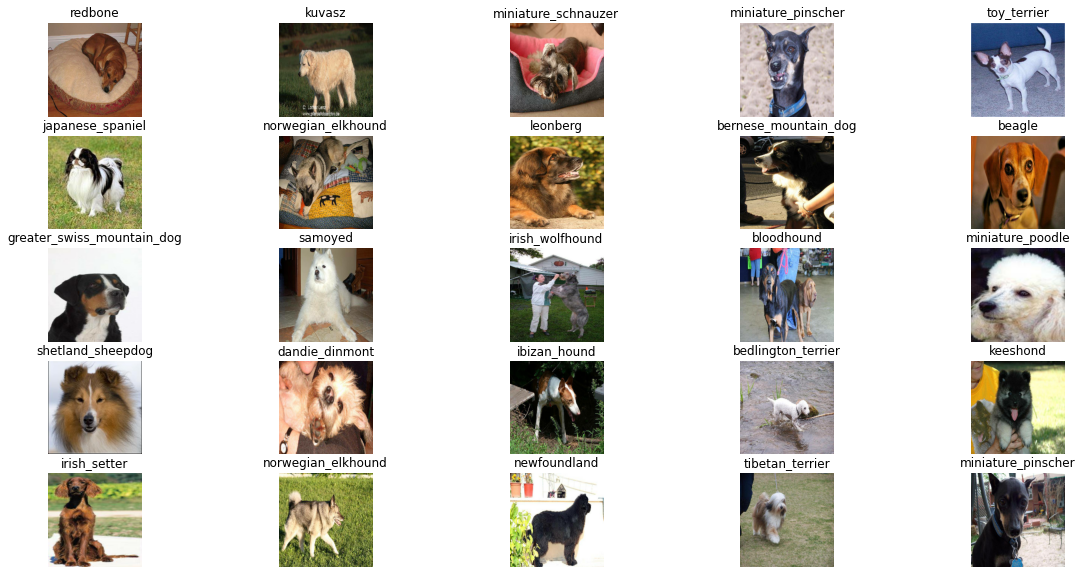

In [26]:
# Visualizing the data in a training batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

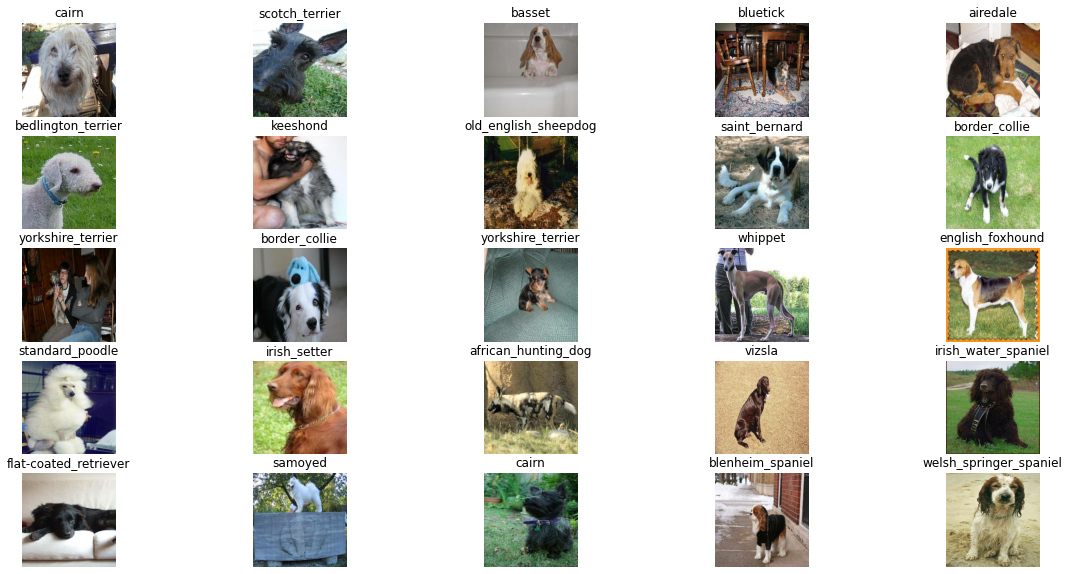

In [27]:
# Visualizing the data in a validation batch
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

# **2. Building a model**

## **`Before we build a model,there are a few things we need to define:`**
> 1. The input shape to our model.(our images shape,in the form of tensors)
> 2. The output shape of our model.(image labels,in the form of tensors)
> 3. The URL of the model we want to use.

In [28]:
# Setting up input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]     # batch, height, width, color channels

# Setting up output shape of the model
OUTPUT_SHAPE = len(unique_breeds)

# Setting up model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"



## **`Now that we've got input,output and model ready,let's put them together into a Keras Deep Learning Model.`**
### **`We will create a function which will do the following tasks:`**
> 1. Takes the input shape,output shape and the model we've chosen as parameters.
> 2. Defines the layers in a Keras Model in sequential fashion(do this first,then this,then that)
> 3. Compiles the model(says how it should be evaluated and improved)
> 4. Builds the model(tells the model the input shape it'll be getting)
> 5. Returns the model.

In [29]:
# Creating a function which builds a Keras Model
def create_model(input_shape= INPUT_SHAPE, output_shape = OUTPUT_SHAPE, model_url = MODEL_URL):
  print("Building a model with ",MODEL_URL)

  # Setting up the model layers
  model = tf.keras.Sequential([
                               hub.KerasLayer(MODEL_URL),    # Layer 1(input layer)
                               tf.keras.layers.Dense(units=OUTPUT_SHAPE,activation="softmax")   # Layer 2(output layer)
                              ])
  # Compiling the model
  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics = ["accuracy"]
  )
  # Build the model
  model.build(INPUT_SHAPE)
  
  return model
  

In [30]:
model = create_model()
model.summary()

Building a model with  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  5432713   
_________________________________________________________________
dense (Dense)                multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


# **3. Creating Callbacks**

### **`Callbacks are helper functions a model can use during training to do such things as:`**
> 1. Save its progress
> 2. Check its progress
> 3. Stop training early if a model stops improving
### **`We will create two callbacks:`**
> 1. One for TensorBoard,which helps track our model's progress
> 2. One for early stopping, which prevents our model for training too long

## ***`3.1: TensorBoard Callback`***
### **`To setup a TensorBoard Callback we need to do 3 things:`**
> * a) Load the TensorBoard Extension.
> * b) Create a TensorBoard Callback which is able to save logs to a directory and pass it to our model's `fit()` function.
> * c) Visualize our model's training logs with the `%tensorboard` magic function.(we'll do this after the model training)

In [31]:
# a) Loading TensorBoard notebook extension
%load_ext tensorboard

In [32]:
import datetime
# b) Creating a function to build a TensorBoard Callback
def create_tensorboard_callback():
  # Create a log directory for storing tensorboard logs
  logs_dir = os.path.join("drive/My Drive/dog-breed-data/logs",
                          # Making it so that the logs get tracked whenever we run a experiment)
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logs_dir)

## ***`3.2: Early Stopping Callback`***
> **It helps us to stop our model from overfitting, by stopping training if a certain evaluaton metric stops improving**

In [33]:
# Creating an early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3)

# **4. Training a model:**
> ## **`Our first model is only going to train on 1000 images, to make sure everything is working.`**

In [34]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [35]:
# Check to make sure we are running on a GPU
print("GPU", "available!" if tf.config.list_physical_devices("GPU") else ("No GPU"))

GPU available!


### **`Let's create a function which trains a model.The function will:`** 
> * Create a model, using `create_mdoel()`
> * Setup a TensorBoard Callback using `create_tensorboard_callback()`
> * Call the `fit()` function on our model, passing it the training data,validation data,number of epochs to train for(`NUM_EPOCHS`) and the callbacks we'd like to use
> * Return to model

In [36]:
# Building a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create the model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data by passing it the callbacks we created
  model.fit(x=train_data,
            epochs = NUM_EPOCHS,
            validation_data = val_data,
            validation_freq = 1,
            callbacks = [tensorboard, early_stopping])
  
  # Return the fitted model
  return model

In [37]:
# Fit the mdoel to the data
model = train_model()


Building a model with  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 357s 14s/step - loss: 4.7313 - accuracy: 0.0962 - val_loss: 3.6396 - val_accuracy: 0.2500
Epoch 2/100
25/25 [==============================] - 7s 263ms/step - loss: 1.7049 - accuracy: 0.6625 - val_loss: 2.3311 - val_accuracy: 0.4950
Epoch 3/100
25/25 [==============================] - 7s 273ms/step - loss: 0.5777 - accuracy: 0.9400 - val_loss: 1.7928 - val_accuracy: 0.6250
Epoch 4/100
25/25 [==============================] - 7s 262ms/step - loss: 0.2562 - accuracy: 0.9900 - val_loss: 1.5947 - val_accuracy: 0.6500
Epoch 5/100
25/25 [==============================] - 7s 262ms/step - loss: 0.1468 - accuracy: 0.9962 - val_loss: 1.5252 - val_accuracy: 0.6450
Epoch 6/100
25/25 [==============================] - 7s 273ms/step - loss: 0.1009 - accuracy: 0.9987 - val_loss: 1.4869 - val_accuracy: 0.6500
Epoch 7/100
25/25 [============================

# **5. Evaluating performance by checking the TensorBoard logs**
> ## **`The TensorBoard magic function "%tensorboard" will access the logs directory and visualize its contents`**

In [38]:
%tensorboard --logdir drive/My\ Drive/dog-breed-data/logs

Output hidden; open in https://colab.research.google.com to view.

# **6. Making and Evaluating Predictions using a trained model**

In [39]:
# Make predictions on validation data(not used to trin on)
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 1s 174ms/step


array([[5.8669080e-03, 7.1302980e-05, 4.5621509e-04, ..., 4.3515477e-04,
        5.5845056e-05, 2.3477951e-03],
       [8.8634957e-03, 2.7947284e-03, 5.4968130e-02, ..., 2.5945264e-04,
        5.8173751e-03, 1.8226942e-04],
       [2.0923897e-05, 6.4342967e-05, 5.8437763e-06, ..., 4.3382842e-04,
        6.9720249e-05, 1.0630657e-03],
       ...,
       [6.5362360e-07, 4.7660909e-05, 2.3993482e-04, ..., 9.5563482e-06,
        7.8027551e-05, 2.8685605e-05],
       [2.0204193e-03, 6.0616882e-04, 1.7301910e-04, ..., 4.0971473e-04,
        4.9526527e-05, 5.0035913e-02],
       [5.1001919e-04, 1.4757267e-04, 1.1278602e-03, ..., 2.3302950e-03,
        3.0668729e-03, 3.7811691e-04]], dtype=float32)

In [40]:
np.sum(predictions[0])

0.99999994

In [41]:
# First Prediction
index = 199
print(predictions[index])
print(f"Max Value(probabilty of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max Index: {np.argmax(predictions[index])}")
print(f"Predicted Label: {unique_breeds[np.argmax(predictions[index])]}")

[5.10019192e-04 1.47572675e-04 1.12786016e-03 4.08930537e-05
 4.61204024e-03 6.64395690e-02 8.88157083e-05 2.85050068e-02
 7.29409949e-05 8.79004830e-04 1.44348332e-05 9.85890813e-03
 2.35836429e-04 1.43238599e-03 3.51304952e-05 3.67284898e-04
 3.42270359e-02 1.97516623e-04 8.90983036e-04 1.17262080e-01
 8.59241845e-05 4.41091288e-05 4.89329919e-04 3.89741654e-05
 4.82080213e-05 2.22893232e-05 1.59595162e-04 4.83751118e-01
 5.70663484e-04 2.74624559e-04 3.92875954e-05 3.76683543e-04
 3.71212300e-05 8.66443738e-02 2.75169878e-04 1.07745123e-04
 1.88936523e-04 9.13052878e-04 4.90878418e-04 7.32539629e-04
 5.33537532e-04 7.51115615e-04 4.27506566e-02 4.26980900e-03
 2.10710918e-03 1.97588488e-05 2.79054919e-04 2.60100845e-04
 1.50301130e-04 1.32798246e-04 9.00591112e-05 2.28663150e-04
 2.34627398e-03 1.83650739e-02 1.55544985e-04 7.70390965e-04
 3.55190859e-05 3.09249357e-04 2.41451708e-04 1.76395464e-04
 9.78937023e-04 4.26894566e-03 6.17860278e-05 1.89832819e-03
 2.16901026e-04 7.225812

### ***`Note: "Prediction Probabilities" are also known as "Confidence Levels.`***

# **7. Transform predictions into text**

## ***`7.1: Turn prediction probabilites into their respective label(easier to understand)`***

In [42]:
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on array of prediction probabilites
pred_label = get_pred_label(predictions[42])
pred_label

'walker_hound'

### **`Now,since our validation data is still in batch dataset, we need to unbatch it to make predictions on the validation images and then compare those predictions to the validation labels(truth labels).`**

## ***`7.2: A function to unbatch a batch dataset`***

In [43]:
# images_unbatched = []
# labels_unbatched = []

# # Loop throgh unbatched data
# for image, label in val_data.unbatch().as_numpy_iterator():
#   images_unbatched.append(image)
#   labels_unbatched.append(label)

# images_unbatched[0], labels_unbatched[0]

In [44]:
# Creating a function to unbatch a dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image,label) Tensors and returns separate arrays of images and labels
  """
  images = []
  labels = []
  
  # Lopp through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  
  return images,labels

# Checking the function
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [45]:
get_pred_label(val_labels[0])

'affenpinscher'

### **Now we've got ways to get:**
* Prediction Labels
* Validation Labels(Truth labels)
* Validation Images
### Now we'll make a function to make these more visualizable.
### **`The function will do the following things:`**
> 1. **Takes an array of prediction probabilites, an array of truth labels and an array of images and an integer.**
> 2. **Convert the prediction probabilites to a predicted label.**
> 3. **Plot the predicted label, its predicted probability, the truth label and the target image in a single plot.**

# **7. Visualizing and Evaluating Model Predictions**

## ***`7.1 : Plotting the validation image along with the breed name with highest prediction probability`***

In [46]:
def plot_pred(prediction_probabilities, labels, images, n=50):
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n] 

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image and remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the titles whether right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Change plot title to be predicted label,probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label, np.max(pred_prob * 100), true_label), color = color)

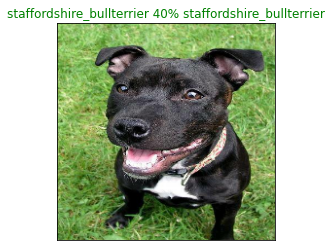

In [47]:
plot_pred(prediction_probabilities=predictions, labels=val_labels, images = val_images)

## **`Now let's make another function to view our model's top 10 predictions. This function will:`**
> 1. **Take an input of prediction probabilities array and a ground truth array and an integer.**
> 2. **Find the prediction label using `get_pred_label()`**
> 3. **Find the top ten:**
  * Prediction Probability Indexes
  * Prediction Probability Values
  * Prediction Labels
> 4. **Plot the top 10 Prediction Probability Values and Labels, coloring the true label green**

## ***`7.2: Plotting the top ten prediction probabilites along with their labels`***

In [48]:
def plot_pred_config(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with the truth label for sample n
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)
  
  # Find the top ten prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]

  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]

  # Find the top ten prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values, 
                     color = "grey")
  plt.xticks(np.arange(len(top_10_pred_labels)), labels = top_10_pred_labels, rotation = "vertical")

  # Change the olor of the true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

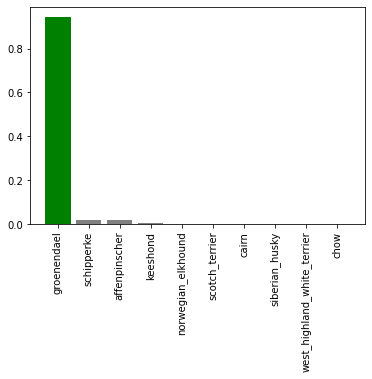

In [49]:
plot_pred_config(prediction_probabilities=predictions, labels = val_labels, n = 77)

## ***`7.3: Let's check out a few predictions and their different values`***    

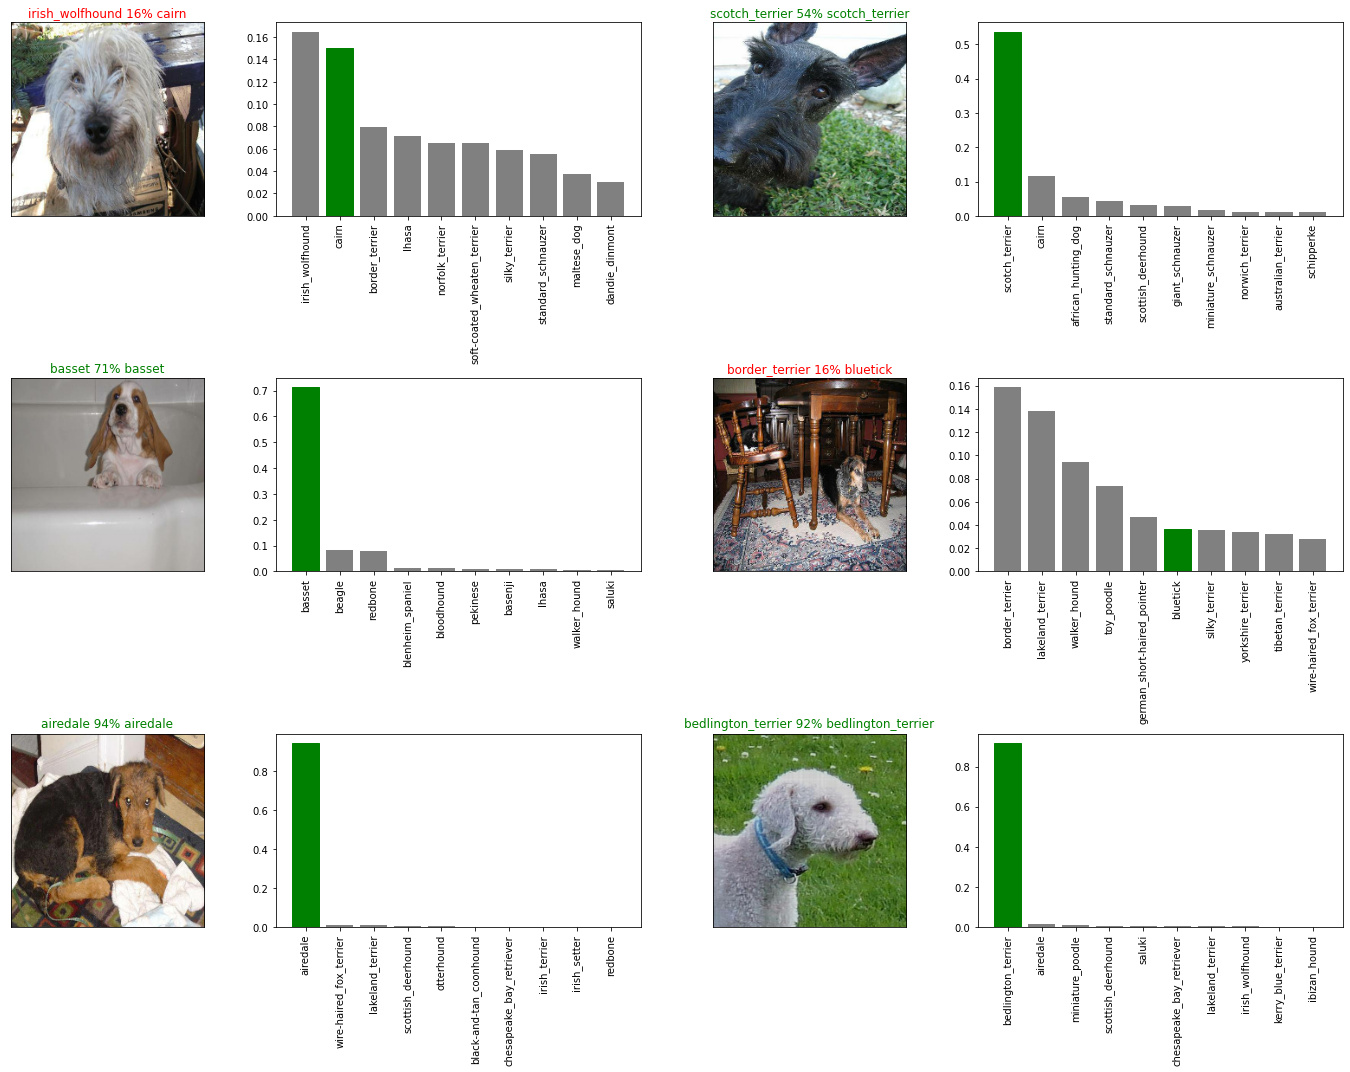

In [50]:
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows * num_cols
plt.figure(figsize=(10 * num_cols, 5 * num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2 * num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,labels = val_labels, images = val_images, n = i + i_multiplier )
  plt.subplot(num_rows, 2* num_cols, 2*i+2)
  plot_pred_config(prediction_probabilities=predictions, labels = val_labels, n = i + i_multiplier)
  plt.tight_layout(h_pad=1.0)
plt.show()

# **8. Saving and Re-Loading a Trained Model**

In [51]:
# Creating a function to save a model
def save_model(model, suffix = None):
  """
  Saves a given model in "mdoels" directory and appends a suffix(a string)
  """
  # Create a model directory pathname with current time
  model_dir = os.path.join("drive/My Drive/dog-breed-data/models",
                           datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  model_path = model_dir + "-" + suffix + ".h5"
  print(f"Saving model to: {model_path} ...")
  model.save(model_path)
  return model_path

In [52]:
# Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified path
  """
  print(f"Loading a saved model from: {model_path} ...")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects = {"KerasLayer":hub.KerasLayer})
  return model

In [53]:
# Save our model,trained on 1000 images
save_model(model, suffix="1000-images-mobilenetv2-Adam")

Saving model to: drive/My Drive/dog-breed-data/models/20200724-180809-1000-images-mobilenetv2-Adam.h5 ...


'drive/My Drive/dog-breed-data/models/20200724-180809-1000-images-mobilenetv2-Adam.h5'

In [54]:
loaded_1000_image_model = load_model("drive/My Drive/dog-breed-data/models/20200723-183110-1000-images-mobilenetv2-Adam.h5")

Loading a saved model from: drive/My Drive/dog-breed-data/models/20200723-183110-1000-images-mobilenetv2-Adam.h5 ...


In [55]:
model.evaluate(val_data)

7/7 [==============================] - 1s 149ms/step - loss: 1.3877 - accuracy: 0.6500


[1.3877285718917847, 0.6499999761581421]

In [56]:
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 1s 159ms/step - loss: 1.2920 - accuracy: 0.6450


[1.2920178174972534, 0.6449999809265137]

# **9. Training Model on Full Dataset**

In [57]:
# Create a DataBatch with the full dataset
full_data = create_data_batches(x, y)

Creating training data batches...


In [58]:
full_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [59]:
# Creating a model for full data
full_model = create_model()

Building a model with  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [60]:
# Creating full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# There is no Validation Set while training on full data. So we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy", patience=3)

### ***`Note: Fitting the model on full training data set will take a long time as there are 10,000+ images. Notice that this took 2 hours on the first epoch`***

In [61]:
# Fit the full model to the full data
full_model.fit(x=full_data, epochs=NUM_EPOCHS, callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 3787s 12s/step - loss: 1.3332 - accuracy: 0.6669
Epoch 2/100
320/320 [==============================] - 64s 201ms/step - loss: 0.4036 - accuracy: 0.8785
Epoch 3/100
320/320 [==============================] - 62s 195ms/step - loss: 0.2410 - accuracy: 0.9339
Epoch 4/100
320/320 [==============================] - 64s 199ms/step - loss: 0.1520 - accuracy: 0.9663
Epoch 5/100
320/320 [==============================] - 64s 201ms/step - loss: 0.1073 - accuracy: 0.9776
Epoch 6/100
320/320 [==============================] - 64s 200ms/step - loss: 0.0775 - accuracy: 0.9877
Epoch 7/100
320/320 [==============================] - 65s 202ms/step - loss: 0.0585 - accuracy: 0.9919
Epoch 8/100
320/320 [==============================] - 62s 194ms/step - loss: 0.0470 - accuracy: 0.9944
Epoch 9/100
320/320 [==============================] - 62s 195ms/step - loss: 0.0380 - accuracy: 0.9959
Epoch 10/100
320/320 [==============================] - 64s 198m

In [62]:
save_model(full_model, suffix = "full-image-set-mobilenetv2-Adam")

Saving model to: drive/My Drive/dog-breed-data/models/20200724-193116-full-image-set-mobilenetv2-Adam.h5 ...


'drive/My Drive/dog-breed-data/models/20200724-193116-full-image-set-mobilenetv2-Adam.h5'

In [63]:
loaded_full_model = load_model("drive/My Drive/dog-breed-data/models/20200724-115718-full-image-set-mobilenetv2-Adam.h5")

Loading a saved model from: drive/My Drive/dog-breed-data/models/20200724-115718-full-image-set-mobilenetv2-Adam.h5 ...



# **10. Making Predictions on the Test Dataset**
## **`Since our model has been traned on images in the form of Tensor Data Batches, we have to convert the test images into the same format.`**
## **`To make predictions on the Test data, we will:`**
> 1. **Get the test image file names.**
> 2. **Convert the filenames into test data batches by using `create_data_batches()` and by setting the `test_data` parameter to `True` since the test data does not have any label.**
> 3. **Make a predictions array by passing the test data batches to the `predict()` method called om our model.**

## ***`10.1: Load Test image filenames`***

In [65]:
test_path = "drive/My Drive/dog-breed-data/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['drive/My Drive/dog-breed-data/test/e9bcd763afd5e192fc047267c0b3cacd.jpg',
 'drive/My Drive/dog-breed-data/test/e9d585ce5dc29b4e9aa6a7332ddfa983.jpg',
 'drive/My Drive/dog-breed-data/test/f1ba2c4a69ed34fea976f8fc6b77f45b.jpg',
 'drive/My Drive/dog-breed-data/test/e8eca3dc497d4bb15b0254bc9f56cdd7.jpg',
 'drive/My Drive/dog-breed-data/test/f50cf15ef4c06e63d9483b48d7bead6b.jpg',
 'drive/My Drive/dog-breed-data/test/f0311d1414f9ce10cffda4c207c108dc.jpg',
 'drive/My Drive/dog-breed-data/test/e91ffd67dd303f59029d041ff4fb65b8.jpg',
 'drive/My Drive/dog-breed-data/test/e91094730afaa4ade3d3041d96d57f3a.jpg',
 'drive/My Drive/dog-breed-data/test/f575720280425098d6faca42cff69a36.jpg',
 'drive/My Drive/dog-breed-data/test/f58b1ce36c59e42dd22be92949fc38a7.jpg']

## ***`10.2: Convert the filenames into test databatches`***

In [66]:
len(test_filenames)

10357

In [67]:
# Create test databatches
test_databatch = create_data_batches(test_filenames,test_data=True)

Creating test data batches...


In [68]:
test_databatch

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

## ***`10.3: Make Predictions on the test data batch using the "full_loaded_model"`***

### ***`Note: Calling `predict()` on our full model and passing it the test data batch will take a long time to run(about 1 hour)`***

In [69]:
test_predictions = loaded_full_model.predict(test_databatch, verbose=1)

324/324 [==============================] - 4199s 13s/step


# **11. Saving the test predictions into a .csv file and reloading them**

In [70]:
# Save he predictions(which is a NumPy Array) to a csv file(to access later)
np.savetxt("drive/My Drive/dog-breed-data/preds_array.csv", test_predictions, delimiter=",")

In [71]:
# Load predictions(which is a Numpy Array) from a .csv file
test_predictions = np.loadtxt("drive/My Drive/dog-breed-data/preds_array.csv", delimiter=",")

In [72]:
test_predictions[:10]

array([[3.55903921e-03, 1.02017226e-03, 9.35616903e-03, ...,
        7.41291186e-03, 3.62351574e-02, 4.01165383e-03],
       [5.86304860e-03, 5.88597171e-03, 2.05115858e-03, ...,
        4.32629790e-03, 1.08373037e-03, 8.03784351e-04],
       [1.22738347e-04, 1.80918090e-02, 1.32299205e-02, ...,
        7.69525359e-04, 1.19559318e-02, 5.02742405e-05],
       ...,
       [5.80141181e-03, 5.96882775e-03, 6.13389816e-03, ...,
        7.34807830e-03, 2.71460856e-03, 1.93508179e-03],
       [1.69200334e-03, 2.66581983e-03, 3.41871666e-04, ...,
        3.78833571e-03, 1.66177447e-03, 1.07249506e-02],
       [1.54360000e-03, 1.24363916e-03, 1.50440633e-03, ...,
        3.02428775e-03, 1.50048360e-02, 7.47415144e-03]])

In [73]:
test_predictions.shape

(10357, 120)

# **12. Preparing test predictions for Kaggle**
## **`To get the data in that format, we'll:`**
> 1. **Create a Pandas DataFrame with an ID column as well as a column for each dog breed.**
> 2. **Add data to the ID column by extracting the test image ID's from their filepaths**
> 3. **Add data(the prediction probabilities for each of the dog breed columns).**
> 4. **Export the DataFrame as a .csv file to submit to Kaggle.**

In [74]:
# Create a Pandas DataFrame with empty columns
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [75]:
# Append test image ID's to prediction dataframe
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
test_ids[:5]

['e9bcd763afd5e192fc047267c0b3cacd',
 'e9d585ce5dc29b4e9aa6a7332ddfa983',
 'f1ba2c4a69ed34fea976f8fc6b77f45b',
 'e8eca3dc497d4bb15b0254bc9f56cdd7',
 'f50cf15ef4c06e63d9483b48d7bead6b']

In [76]:
preds_df["id"] = test_ids

In [77]:
preds_df.head()

id  ... yorkshire_terrier
0  e9bcd763afd5e192fc047267c0b3cacd  ...               NaN
1  e9d585ce5dc29b4e9aa6a7332ddfa983  ...               NaN
2  f1ba2c4a69ed34fea976f8fc6b77f45b  ...               NaN
3  e8eca3dc497d4bb15b0254bc9f56cdd7  ...               NaN
4  f50cf15ef4c06e63d9483b48d7bead6b  ...               NaN

[5 rows x 121 columns]

In [78]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

id  ... yorkshire_terrier
0  e9bcd763afd5e192fc047267c0b3cacd  ...        0.00401165
1  e9d585ce5dc29b4e9aa6a7332ddfa983  ...       0.000803784
2  f1ba2c4a69ed34fea976f8fc6b77f45b  ...       5.02742e-05
3  e8eca3dc497d4bb15b0254bc9f56cdd7  ...        0.00367481
4  f50cf15ef4c06e63d9483b48d7bead6b  ...       0.000455558

[5 rows x 121 columns]

In [79]:
# Save our predictions dataframe to csv for submission to Kaggle
preds_df.to_csv("drive/My Drive/dog-breed-data/full_model_prediction_submit1.csv", index = False)

# **13. Making Predictions on Custom Images**
## **`To make predictions on custom images, we'll:`**
> 1. **Get the filepaths of the custom images.You have to upload them in the google drive folder.**
> 2. **Turn the filepaths into databatches using `create_data_bathces()`.And as our custom images don't have labels we need to set the `test_data` parameter to `True`.**
> 3. **Pass the custom image databatch to our model's `predict()` method**
> 4. **Convert the prediction output probabilities into prediction labels(so that we can understand).**
> 5. **Compare the predicted labels to the Custom Images.**

In [80]:
# Get the custom image filepaths
custom_path = "drive/My Drive/dog-breed-data/new-dog-photos/"
custom_image_path = [custom_path + fname for fname in os.listdir(custom_path)]

In [81]:
custom_image_path

['drive/My Drive/dog-breed-data/new-dog-photos/chihua.jpg',
 'drive/My Drive/dog-breed-data/new-dog-photos/german-shepherd.jpg',
 'drive/My Drive/dog-breed-data/new-dog-photos/bulldog.jpg',
 'drive/My Drive/dog-breed-data/new-dog-photos/labrador-retriever.jpg',
 'drive/My Drive/dog-breed-data/new-dog-photos/doberman.jpg']

In [82]:
# Turn Custom Images into DataBatches
custom_image_batch = create_data_batches(custom_image_path, test_data=True)
custom_image_batch

Creating test data batches...


<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [83]:
# Make Predictions on the custom data
custom_preds = loaded_full_model.predict(custom_image_batch)

In [84]:
custom_preds.shape

(5, 120)

In [85]:
# Get Cuatom image prediction labels
custom_pred_labels = [get_pred_label(prediction_probabilities=custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['blenheim_spaniel',
 'pembroke',
 'english_foxhound',
 'basset',
 'english_springer']

In [86]:
# Get Custom images(Our `unbatchify()` function won't work as there is no label. Need to improve the function later.)
custom_images = []
# Loop through unbatched data
for image in custom_image_batch.unbatch().as_numpy_iterator():
  custom_images.append(image)

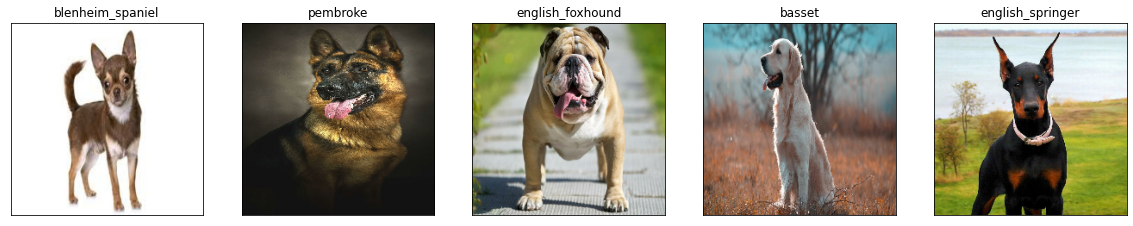

In [88]:
# Check custom image predictions
plt.figure(figsize=(20,20))
for i, image in enumerate(custom_images):
  plt.subplot(1, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)